# Notebook 01 - Exploratory Data Analysis (EDA)

### Goal of this notebook:

At the end of this notebook, it could be possible to answer:

- "What kind of customer do we have, and how do the differ?"

No clustering yet. Only understandig the data.

In [65]:
# Imports
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

## 1. Look and explore data
### Load and examine the dataset:

In [47]:
# Load dataset
df = pd.read_csv('../data/raw/Mall_Customers.csv')

# First look at data
df.head()
df.tail()
df.sample(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
187,188,Male,28,101,68
5,6,Female,22,17,76
55,56,Male,47,43,41
70,71,Male,70,49,55
50,51,Female,49,42,52


In [46]:
# Dataset dimensions
df.shape

# Column information
df.info()
df.dtypes

# Statistical summary
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


## 2. Data Quality Assessment

### Check for missing values and duplicates:

In [57]:
# Missing values

df.isna().sum()
df.isna().sum() * len(df) / 100

CustomerID                0.0
Gender                    0.0
Age                       0.0
Annual Income (k$)        0.0
Spending Score (1-100)    0.0
dtype: float64

## 3. Univariate Anaylisis
### Analyze individual variables:

#### Numerical Features

##### Age

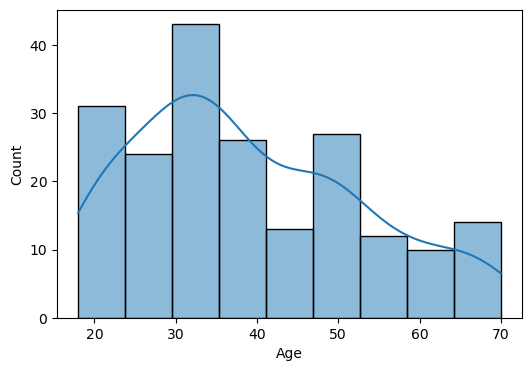

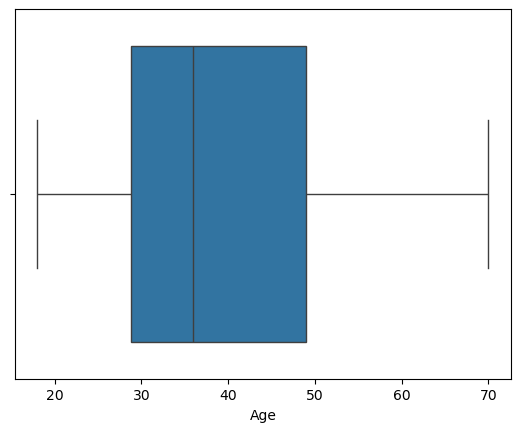

In [113]:
df['Age'].describe()
df['Age'].value_counts()

# Distribution plots
plt.figure(figsize=(6,4))
sns.histplot(df['Age'], kde=True)
plt.show()

sns.boxplot(x=df['Age'])
plt.show()

##### Annual Income (k$)

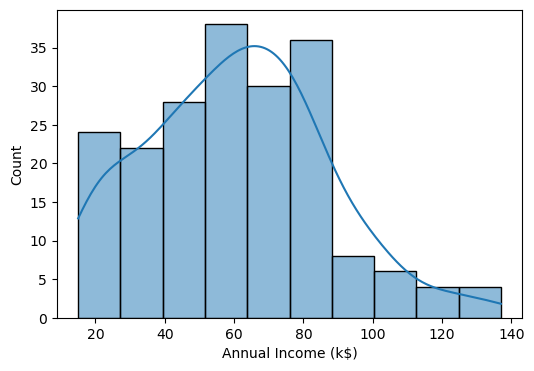

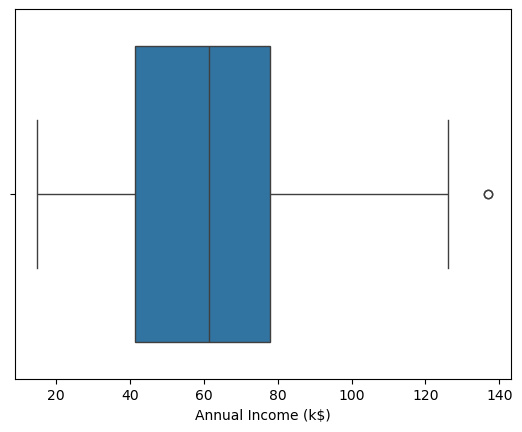

In [83]:
df['Annual Income (k$)'].describe()
df['Annual Income (k$)'].value_counts()

# Distribution plots
plt.figure(figsize=(6,4))
sns.histplot(df['Annual Income (k$)'], kde=True)
plt.show()

sns.boxplot(x=df['Annual Income (k$)'])
plt.show()


##### Spending Score (1-100)

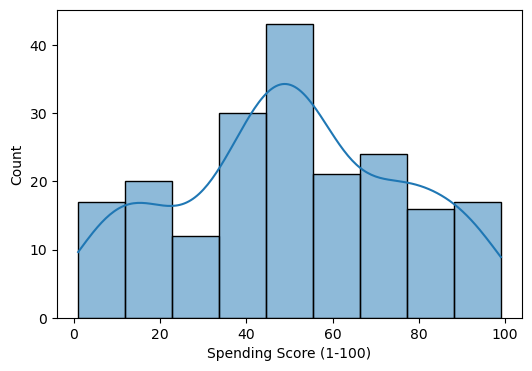

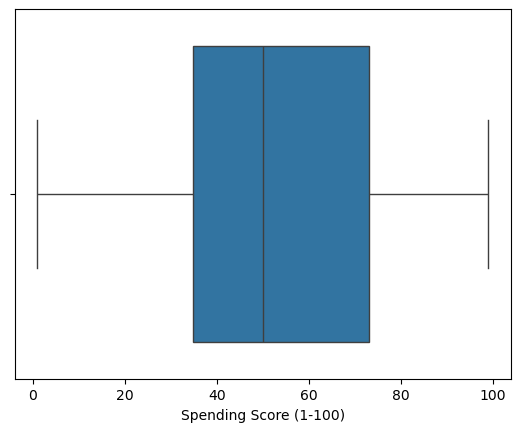

In [96]:
df['Spending Score (1-100)'].describe()
df['Spending Score (1-100)'].value_counts()

# Distribution plots
plt.figure(figsize=(6,4))
sns.histplot(df['Spending Score (1-100)'], kde=True)
plt.show()

sns.boxplot(x=df['Spending Score (1-100)'])
plt.show()

##### All numerical features

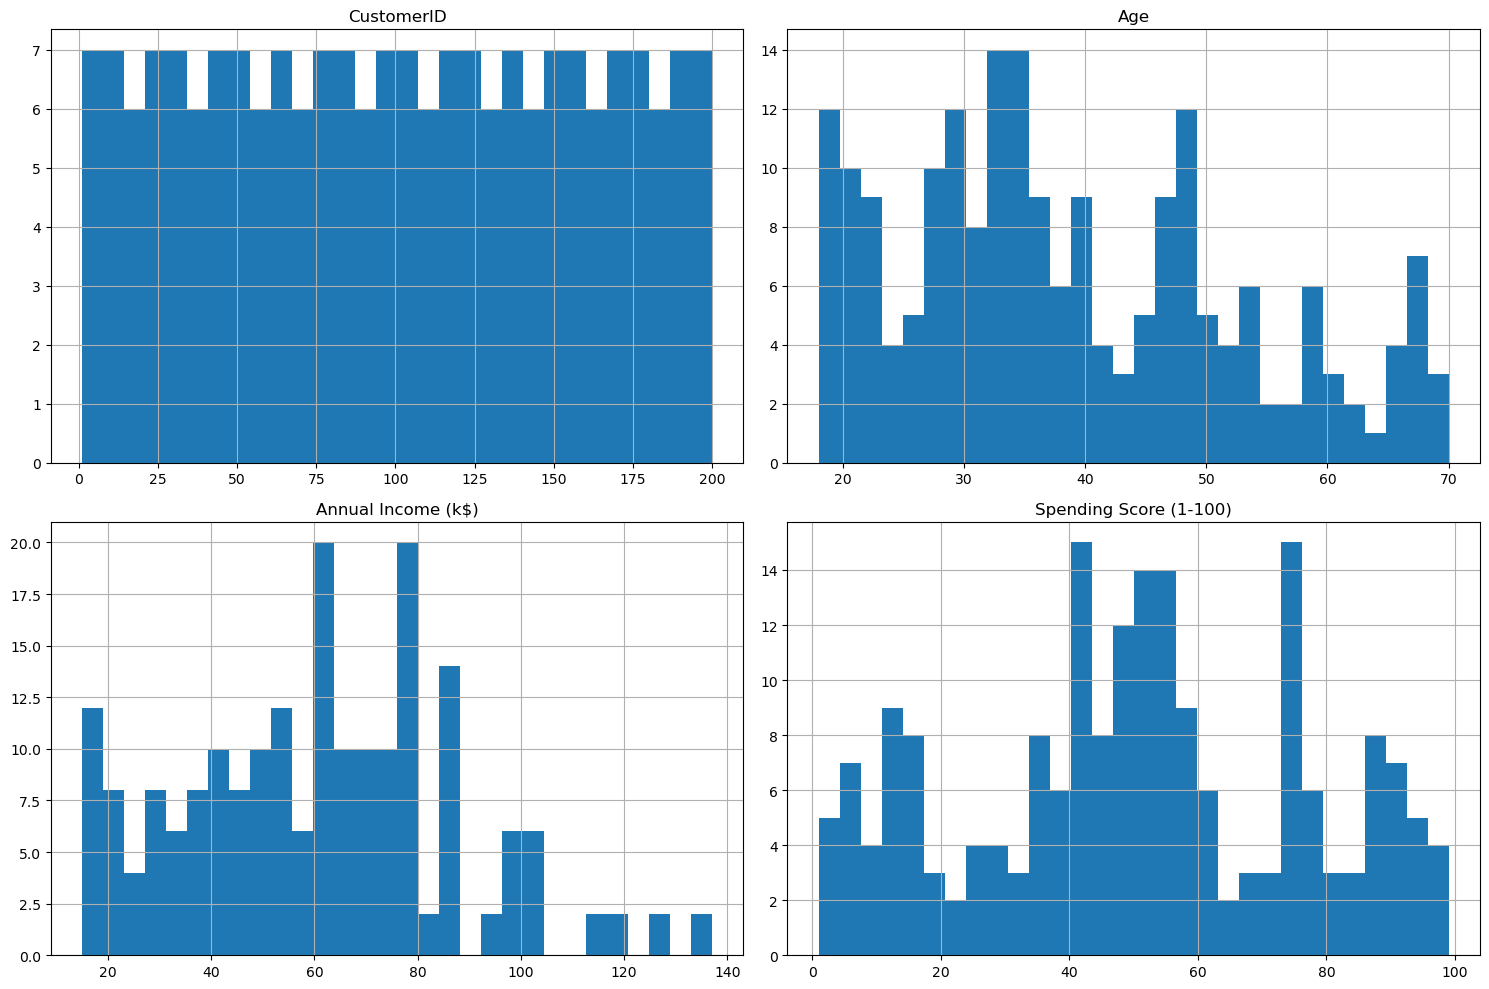

In [97]:
df.hist(figsize=(15, 10), bins=30)
plt.tight_layout()
plt.show()

### 3.1 Categorical Features

##### Gender

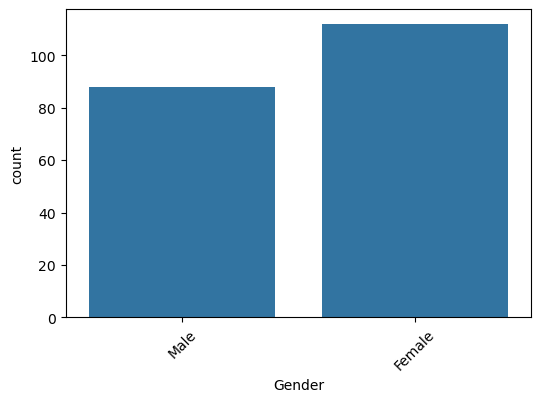

In [94]:
df['Gender'].describe()
df['Gender'].value_counts()

# Distribution plots
plt.figure(figsize=(6,4))
sns.countplot(x='Gender', data=df)
plt.xticks(rotation=45)
plt.show()

## 4. Bivariate Anaylisis
### Explore relationships between variables: Numerical

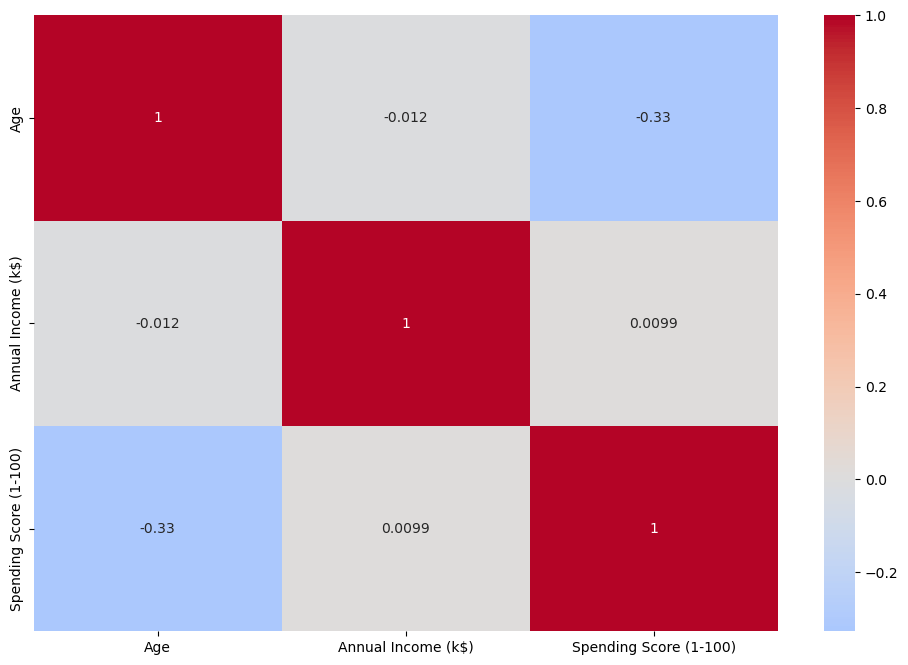

In [111]:
# Dataset without CustomerID
df_corr = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

# Correlation matrix
correlation_matrix = df_corr.corr(numeric_only = True)

# Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.show()

### Results

#### 1. Age vs Spending Score: -0.33
- Moderate negative correlation
- As age increases, spendig score tends to decrease

**Interpretation:** Younger customers tend to have higher spending scores, while older customers generally spend less.

#### 2. Annual Income vs Spending Score: 0.01
- **Almost no correlation**
- High incomes does not impliy high spending

#### 3. Age vs Annual Income: -0.01
- **No meaning relationship**
- Age und income appear independent in this dataset

### Explore relationships between variables: Categorical

##### Gender vs Spending Score

In [120]:
df.groupby('Gender')['Spending Score (1-100)'].describe()

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
Female,112.0,51.526786,24.11495,5.0,35.0,50.0,73.0,99.0
Male,88.0,48.511364,27.89677,1.0,24.5,50.0,70.0,97.0


<Axes: xlabel='Gender', ylabel='Spending Score (1-100)'>

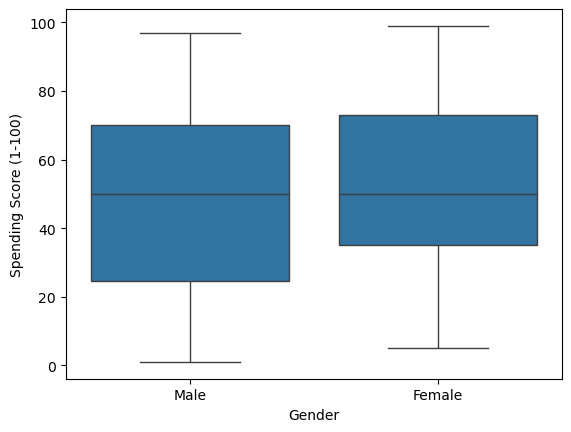

In [117]:
sns.boxplot(data=df, x='Gender', y='Spending Score (1-100)')

## 5. EDA Conclusions

### 1. Data Quality and Structure

This dataset contains demograph and behavioral information about customers with no missing values.

**Conclusion:** This dataset is clean and suitable for segmentation.

### 2. Customers Demographics

-  Customers are mainly concentrated in young to middle-age groups.
-  Annual income is relatively evenly distributed across customers.
-  Gender distribution is balanced, **suggesting no strong sampling bias**

**Conclusion:** The dataset represents a diverse customer base suitable for behavioral analysis.

### 3. Spending Behavior Pattern

- Scoring Score shows high variability across customers, indicating different purchansing behaviors.
- A moderate negative relationship exists between age and spending score, suggestings younger customers tend to spend more.
- Annual income shows little to no linear relationship with spending score.

**Conclusion:** Spending behavior cannot be explained by income alone, **reinforcing the need for customer segmentation**

### 4. Relationship Between Variables

- Correlation analysis highlights that age has more influence on spending behavior that income.
- Categorical analysis shows no strong differences in spending behavior based on gender alone.

**Conclusion:** Behavioral differents are likely driven by combinations of factors rather than singles variables.

### 5. Implications for Segmentation

- The lack of strong linear relationships suggests that unsupervised learning methods are appropiate.
- Annual income and spending score appear to be the most informative features for clustering.
- Age may provide additional context but should be evaluated careffully in distance-based models.

#### Final Conclusion

- Customer segmentation is justified for this dataset, and clustering techniques can help uncover meaningful customer groups that are not visible through simple statistical relationships.
- Age shows a moderate relationship with spending, indicating behavioral trends.
- However, income and spending score capture complementary dimensions with low correlation, allowing for more diverse customer groupings.
- Therefore, income and spending score are selected as primary clustering features, while age is considered as an optional extension.